<a href="https://colab.research.google.com/github/Arthi26A/NLP/blob/main/D_Arthi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import os
file_list = os.listdir('/content/drive/MyDrive/')
print(file_list)

['💖𝐅𝐚𝐯𝐨💯', 'IT FORM 2019-20 CPS S.SAMUEL SELVARAJ B.SC,M.A.,B.ED., SCIENCE BT, COIMBATORE-38  DOWNLOAD.xls', 'Chemistry ', 'CHEMISTRY  (1)', 'CHEMISTRY ', 'AADHAR (1).pdf', 'cowin certificate .pdf', 'Manual', 'Classroom', 'Nptel certificate ', 'ARTHI.D-1.pdf', 'Colab Notebooks', 'iris Flower classification.ipynb', 'MOVIE REVIEW.ipynb', 'Fake.csv', 'True.csv']


In [24]:
import pandas as pd

True_df_path = "/content/drive/MyDrive/True.csv"
Fake_df_path = "/content/drive/MyDrive/Fake.csv"

# Load dataframes
True_df = pd.read_csv(True_df_path)
Fake_df = pd.read_csv(Fake_df_path)
def label_data(df, label):
    df['label'] = label
    return df

# Label the fake and true DataFrames
Fake_df = label_data(Fake_df, 0)  # 0 represents fake data
True_df = label_data(True_df, 1)  # 1 represents true data

# Print the labeled DataFrames
print(Fake_df.head())
print(True_df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
                                               title  \
0  As U.S. budget fight looms, Republicans

In [26]:
# Define a function to combine the DataFrames
def combine_data(Fake_df, True_df):
    combined_df = pd.concat([Fake_df, True_df])
    return combined_df

# Combine the fake and true DataFrames
combined_df = combine_data(Fake_df, True_df)

# Print the combined DataFrame
print(combined_df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


(44898, 5)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
                                                   title  \
21412  'Fully committed' NA

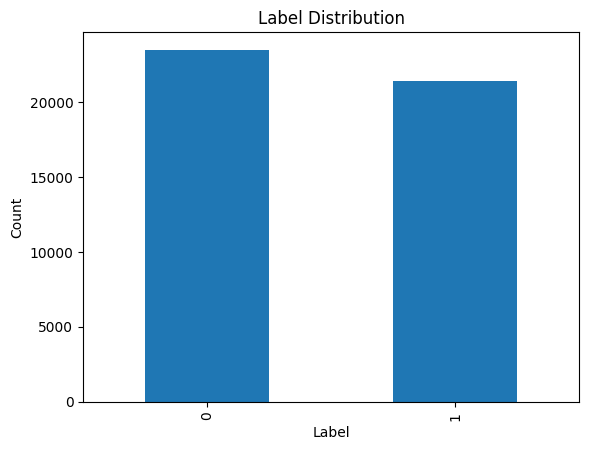

In [27]:
# Print the shape of the DataFrame
print(combined_df.shape)

# Print the first few rows of the DataFrame
print(combined_df.head())

# Print the last few rows of the DataFrame
print(combined_df.tail())

# Print the value counts of the label column
print(combined_df['label'].value_counts())

# Plot a bar chart of the label distribution
import matplotlib.pyplot as plt
combined_df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [30]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the 'punkt' resource
nltk.download('punkt')

# Define a function to clean the text data
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Lower case the tokens
    tokens = [token.lower() for token in tokens]

# Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [31]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function to vectorize the text data
def vectorize_text(text):
    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer to the text data and transform it into vectors
    vectors = vectorizer.fit_transform(text)

    return vectors

# Vectorize the text data
vectors = vectorize_text(combined_df['text'])

# Print the vectorized text data
print(vectors.shape)

(44898, 122002)


In [32]:
# Reduce the size of the dataset to 1000 instances
combined_df = combined_df.sample(n=1000, random_state=42)